<a href="https://colab.research.google.com/github/lucasestrela/dec_consumo_poupanca/blob/main/Lista_1_Vari%C3%A1veis_instrumentais_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 1)** 

Considere o modelo:

$$y_t = \mu + \phi_1 y_{t-1} + \varepsilon_t$$

em que $|\phi_1| < 1$ e $\varepsilon_t \sim iidN(0, \sigma^2_{\varepsilon})$. Suponha que tenhamos uma amostra $y_t$, $t = 0, ..., T$, com $y_0 = 0$

## Item a)
Calcule $E[\varepsilon_t]$, $E[\varepsilon_t y_{t-1}]$, $E[\varepsilon_t y_{t-2}]$ e $E[\varepsilon_t^2]$

---
**Resposta**

* $E[\varepsilon_t] = 0$

Podemos escrever o processo de $y_t$ recursivamente como $y_t = \mu \sum_{i=0}^{t} \phi_1^i + \phi_1^t y_0 + \sum_{i=0}^{t} \phi_1^i \varepsilon_{t-i}$ e como sabemos que $|\phi_1| < 1$, então $y_t = \frac{\mu}{1-\phi_1} + \sum_{i=0}^{\infty} \phi_1^i \varepsilon_{t-i}$. Substituindo a expressão no valor esperado, temos:

* 
$$  E[\varepsilon_t y_{t-1}] = E \bigg[\varepsilon_t \Big(\frac{\mu}{1-\phi_1} + \sum_{i=0}^{\infty} \phi_1^i \varepsilon_{t-i} \Big ) \bigg] = \sum_{i=0}^{\infty} \phi_1^i E[\varepsilon_t \varepsilon_{t-i}] = 0 $$

De modo semelhante,
* $E[\varepsilon_t y_{t-2}] = 0 $

* $E[\varepsilon_t^2] = Var(\varepsilon_t) + E^2[\varepsilon_t] = \sigma^2_{\varepsilon}$


## Item b)

Usando os resultados de (a) construa condições de momento para estimar $\mu$, $\sigma^2_\varepsilon$ e $\phi_1$

---
**Resposta**

Uma vez que queremos estimar 3 parâmetros, precisamos de pelo menos 3 condições de momentos populacionais. Do item anterior já possuímos:


1.  $E[\varepsilon_t] = E[y_t - \phi_1 y_{t-1} - \mu] = 0$.

2.  $E[\varepsilon_t y_{t-1}] = E[(y_t - \phi_1 y_{t-1} - \mu) y_{t-1}] = 0 $

3.  $E[\varepsilon_t^2] = \sigma^2_{\varepsilon}$.

Igualando os momentos populacionais aos momentos amostrais, escrevemos:

\begin{align}
    \sum_{j=1}^{T} y_j - \hat{\phi_1} y_{j-1} - \hat{\mu} = 0 \tag{1} \\
    \sum_{j=1}^{T} (y_j - \hat{\phi_1} y_{j-1} - \hat{\mu}) y_{j-1} = 0  \tag{2}\\
    \sum_{j=1}^{T} \varepsilon_j^2 - T \hat{\sigma}^2_{\varepsilon} = 0  \tag{3}
\end{align}

rearrajando os termos de (1), obtemos

$$\sum_{j=1}^{T} y_j - \hat{\phi_1} \sum_{j=1}^{T} y_{j-1} = \hat{\mu} $$

rearranjando (2) e substituindo a equação acima,

\begin{align*}
    \sum_{j=1}^{T} y_j y_{j-1} - \hat{\phi_1} y_{j-1} y_{j-1} - \hat{\mu} y_{j-1} & = 0 \\
    %
    \sum_{j=1}^{T} y_j y_{j-1} - \hat{\mu} \sum_{j=1}^{T}  y_{j-1} & = \hat{\phi_1} \sum_{j=1}^{T} y_{j-1}^2 \\
    %
    \sum_{j=1}^{T} y_j y_{j-1} - \Big (\sum_{j=1}^{T} y_j - \hat{\phi_1} \sum_{j=1}^{T} y_{j-1} \Big) \sum_{j=1}^{T}  y_{j-1} & = \hat{\phi_1} \sum_{j=1}^{T} y_{j-1}^2 \\
    %
    \sum_{j=1}^{T} y_j y_{j-1} - \sum_{j=1}^{T} y_j \sum_{j=1}^{T}  y_{j-1} + \hat{\phi_1} \sum_{j=1}^{T} y_{j-1} \sum_{j=1}^{T}  y_{j-1} & = \hat{\phi_1} \sum_{j=1}^{T} y_{j-1}^2 \\
    %
    \sum_{j=1}^{T} y_j y_{j-1} - \sum_{j=1}^{T} y_j \sum_{j=1}^{T}  y_{j-1} & = \hat{\phi_1} \Big( \sum_{j=1}^{T} y_{j-1} - \sum_{j=1}^{T} y_{j-1} \sum_{j=1}^{T}  y_{j-1}^2 \Big)\\
    %
    \frac{\sum_{j=1}^{T} y_j y_{j-1} - \sum_{j=1}^{T} y_j \sum_{j=1}^{T}  y_{j-1}}{\sum_{j=1}^{T} y_{j-1} - \sum_{j=1}^{T} y_{j-1} \sum_{j=1}^{T}  y_{j-1}^2 } & = \hat{\phi_1} 
\end{align*}

por último, de (3)

\begin{align*}
\sum_{j=1}^{T} \hat{\varepsilon}_j^2 = T \hat{\sigma}^2_{\varepsilon} \\
\sum_{j=1}^{T}  (y_j - \hat{\phi_1} y_{j-1} - \hat{\mu})^2 = T \hat{\sigma}^2_{\varepsilon} \\
\sum_{j=1}^{T}  (y_j - \hat{y}_{j} )^2 = T \hat{\sigma}^2_{\varepsilon} \\
\end{align*}

## Item c)
Explique como seria implementado o estimador GMM para as condições de momento definidas em (b)



---
**Resposta**

Seja

\begin{align*}
    h(\boldsymbol\theta ; w) = 
    \begin{pmatrix}
    y_t - \phi_1 y_{t-1} - \mu \\
    (y_t - \phi_1 y_{t-1} - \mu) y_{t-1} \\
    \varepsilon_j^2 - \sigma^2_{\varepsilon}
\end{pmatrix}
\end{align*}

e $g(\boldsymbol\theta ; w) = \frac{1}{T}  \sum_{j=1}^{T} h(\boldsymbol\theta ; w)$, isto é,

\begin{align*}
    g(\boldsymbol\theta ; w) = 
    \begin{pmatrix}
    \frac{1}{T} \sum_{j=1}^{T} y_j - \phi_1 y_{j-1} - \mu \\
    \frac{1}{T} \sum_{j=1}^{T} (y_j - \phi_1 y_{j-1} - \mu) y_{j-1} \\
    \frac{1}{T} \sum_{j=1}^{T} \varepsilon_j^2 - \sigma^2_{\varepsilon}
\end{pmatrix}
\end{align*}

Para implementar o estimador GMM, deve-se minimizar a seguinte forma quadrática:

\begin{align*}
    Q(\boldsymbol \theta; Y_t) = [g(\boldsymbol \theta; Y_t)]' W [g(\boldsymbol \theta; Y_t)],
\end{align*}
onde $W$ é uma matriz de pesos.

## Item d)  
Seria possivel realizar o teste J de sobreidentificação? Por que?

---
 **Resposta**

 Não é possível, pois as condições de momento são da mesma dimensão dos parâmetros, isto é, esta exatamente identificado. Assim, não é possível fazer o teste de sobreidentificação

## Item e)

Simule um AR(1) com $\mu = 2$, $\phi_1 = 0.5$ e $\varepsilon_t \sim iidN(0, \sigma^2_{\varepsilon})$ sendo $\sigma_\varepsilon^2 = 1$ e $t = 0, ..., T$. Assuma que $y_0 = 0$. Considere dois tamanhos de amostra, $T = 100$ e $T = 500$. Para cada tamanho de amostra:


> 1. Use as condições de momento definidas em (b) para estimar o vetor de parâmetros $\boldsymbol\theta = [\mu \quad \sigma^2_\varepsilon  \quad  \phi_1]'$ e faça o teste J de sobreidentificação, usando o nível de significância de 5%.

> 2. Repita este procedimento mil vezes, obtendo $\hat\mu^{(r)}, \hat\phi_1^{(r)}, {\hat\sigma^2_{\varepsilon}}^{(r)}$ , $r = 1, ..., 1000$.

> 3. Estude o comportamento dessas estimativas (média, desvio-padrão, máximo, mínimo, histograma) e calcule o tamanho
do teste J de sobreidentificação.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.gmm import GMM

In [ ]:
# Simulando um AR(1)

#Tamanhos de amostras
T1, T2 = 100, 500

np.random.seed(1)
# Simulando T1 obs de normal(0,1)
erro1 = np.random.normal(size=T1)

y1 = np.zeros(T1)
# Preencho a partir do 1, ja que y_0 = 0
for t in range(1,T1):
    y1[t] = 2 + 0.5*y1[t-1] + erro1[t]


np.random.seed(2)
# Simulando T2 obs de normal(0,1)
erro2 = np.random.normal(size=T2)

# Construindo vetor de zeros para popular
y2 = np.zeros(T2)
# Preencho a partir do 1, ja que y_0 = 0
for t in range(1,T2):    
    y2[t] = 2 + 0.5*y2[t-1] + erro2[t]

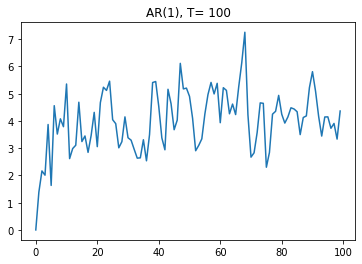

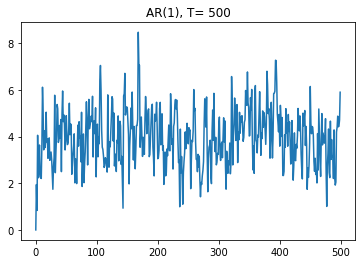

In [ ]:
plt.plot(range(0, T1), y1)
plt.title("AR(1), T= 100")
plt.show()


plt.plot(range(0, T2), y2)
plt.title("AR(1), T= 500")
plt.show()

In [ ]:
# Rodando o GMM
gmm(endog = dcd, exog = cd, instrument = inst, k_moms=4, k_params=4).fit(beta0)

## Item f)  

Considere o modelo AR(2):

$$yt = \mu + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \varepsilon_t$$
Simule este modelo com $\mu = 2$, $\phi_1 = 0.5$, $\phi_2 = 0.3$ e $\varepsilon_t \sim iidN(0, \sigma^2_\varepsilon)$, sendo $\sigma^2_\varepsilon = 1$, e $t = 0, ..., T$. Assuma que $y_0 = y_1 = 0$.

Considere dois tamanhos de amostra, T = 100 e T = 500. Para cada tamanho de amostra:

> 1. Use as condições de momento definidas em (b) para estimar o vetor de parâmetros $\boldsymbol\theta = [\mu \quad \sigma^2_\varepsilon  \quad  \phi_1  \quad  \phi_2]'$ e faça o teste J de sobreidentificação, usando o nível de significância de 5%.

> 2. Repita este procedimento mil vezes, obtendo $\hat\mu^{(r)}, \hat\phi_1^{(r)}, \hat\phi_2^{(r)}, {\hat\sigma^2_{\varepsilon}}^{(r)}$ , $r = 1, ..., 1000$.

> 3. Estude o comportamento dessas estimativas (média, desvio-padrão, máximo, mínimo, histograma) e calcule o tamanho
do teste J de sobreidentificação.




## Item g)

Após analisar os resultados das simulações feitas em (e) e (f), quais conclusões são obtidas sobre a performance do GMM e do teste J de sobreidentificação? Dica: calcule $E[\varepsilon_t]$, $E[\varepsilon_t y_{t-1}]$, $E[\varepsilon_t y_{t-2}]$ e $E[\varepsilon_t^2]$ para o modelo AR(2) e construa condições de momento para estimar $\sigma^2_{\varepsilon}, \mu, \phi_1$ e $\phi_2$


# Problema 2)

Mostre que os estimadores de MÌnimos Quadrados Ordin·rios (OLS) e MÌnimos Quadrados em Dois
Estágios (TSLS) podem ser vistos como casos particulares do MÈtodo Generalizado dos Momentos (GMM). Dica: Seção 14.2 do Hamilton

# Problema 3)

Discuta como quebras estruturais podem ser incorporadas a estimação por GMM. Dica: Seção 14.3 do
Hamilton


# Problema 4) 

Considere o seguinte PGD:



\begin{align} 
\varepsilon_t & \sim iidN (0, 1) \\
\upsilon_t & \sim iidN (0, 1) \\
\xi_t & \sim iidN (0, 1) \\
x_t & = \lambda \varepsilon_t + \upsilon_t \\
z_t & = \delta \upsilon_t + \xi_t \\
y_t & = \beta_0 + \beta_1 x_t + \varepsilon_t \tag{1} \\
\end{align}

em que $t = 1, ..., T$, $\beta_0 = 1$ e $\beta_1 = 1/2$




##Item a) 

Calcule a covariância entre $x_t$ e $\varepsilon_t$. Em qual circunstância $x_t$ é endógeno no modelo (1)?

----

**Resposta:**

\begin{align}
Cov(x_t, \varepsilon_t) & = E[x_t \varepsilon_t] - E[x_t] E[\varepsilon_t] \\
%
& = E[x_t \varepsilon_t] \\
%
& = E[(\lambda \varepsilon_t + \upsilon_t) \varepsilon_t]  \\
%
& = \lambda E[\varepsilon_t^2] + E[\upsilon_t \varepsilon_t]  \\
%
& = \lambda 
\end{align}

Note que se $\lambda \neq 0$ a covariância entre o regressor de (1) e o erro é $\neq 0$, portanto, não vale a hipótese de exogeneidade do regressor. Em outras palavras, para haver endogeneidade, basta que $\lambda \neq 0$.




##Item b) 

Calcule a covariância entre $x_t$ e $z_t$. O que ocorre com esta covariância se $\delta$ é igual a zero?

----

**Resposta:**

\begin{align}
Cov(x_t, z_t) & = E[x_t z_t] - E[x_t] E[z_t] \\
%
& = E[(\lambda \varepsilon_t + \upsilon_t) (\delta \upsilon_t + \xi_t)] - E[\lambda \varepsilon_t + \upsilon_t] E[\delta \upsilon_t + \xi_t]\\
%
& = E[\lambda \varepsilon_t \delta \upsilon_t + \lambda \varepsilon_t \xi_t + \upsilon_t \delta \upsilon_t + \upsilon_t \xi_t] \\
%
& = \lambda \delta E[ \varepsilon_t  \upsilon_t] + \lambda E[\varepsilon_t \xi_t] + \delta E[\upsilon_t^2 ] + E[\upsilon_t \xi_t] \\
%
& = \delta 
\end{align}

Caso $\delta = 0$, então $x_t$ e $z_t$ são ortogonais.

##Item c)

Simule o PGD acima para cada um dos cenários descritos no Quadro 1, considerando T = 100 e T = 500

$$\text{Quadro 1 - Cenario}$$
\begin{array}{ccc}
\hline
Cenario & \lambda & \delta \\ \hline
1 & 0 & 1/2 \\ 
2 & 1/2 & 0 \\
3 & 1/2 & 1/5 \\
4 & 1/2 & 1/4 \\
5 & 1/2 & 1/3 \\
6 & 1/2 & 1/2 \\ \hline
\end{array}


Para cada cenário e tamanho de amostra:
1. Estime o modelo (1) usando ora o método de MQO ora o método de VI (com $z_t$ como instrumento)

2. Repita este procedimento mil vezes, obtendo $\hat{\beta_0}^{(r)}$ e $\hat{\beta_1}^{(r)}$, $r = 1, ..., 1000$.
3. Estude o comportamento dessas estimativas (média, desvio-padrão, máximo, mínimo, histograma) e dos testes t delas (tamanho).

In [81]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [32]:
#Tamanhos de amostras
T1, T2 = 100, 500

# Grid de parametros dos diferentes cenarios
lammbda = np.array([0, 1/2, 1/2, 1/2, 1/2, 1/2])
delta   = np.array([1/2, 0, 1/5, 1/4, 1/3, 1/2])

# Parametros populacionais
beta0, beta1 = 1, 1/2


# Criando vetor de parametros a ser populado
parametros = np.ones( (1000, 2, len(lammbda)) ) * np.inf


for idx_param in range(0,len(lammbda)):
    for i in range(0, 1000):
        
        # Simulando T1 obs de normal(0,1)
        epsilon_T1 = np.random.normal(size=T1)
        upsilon_T1 = np.random.normal(size=T1)
        xi_T1      = np.random.normal(size=T1)
        
        
        # Gerando a série
        x_T1 = lammbda[idx_param]*epsilon_T1 + upsilon_T1
        z_T1 = delta[idx_param]*upsilon_T1 + xi_T1
        y_T1 = beta0 + beta1*x_T1 + epsilon_T1
        
        
        # Rodando o modelo
        mod = sm.OLS(y_T1, sm.add_constant(x_T1))
        
        
        # Fitando
        res = mod.fit()
        
        
        # Salvando os parâmetros
        parametros[i, 0, idx_param] = res.params[0]
        parametros[i, 1, idx_param] = res.params[1]

No handles with labels found to put in legend.


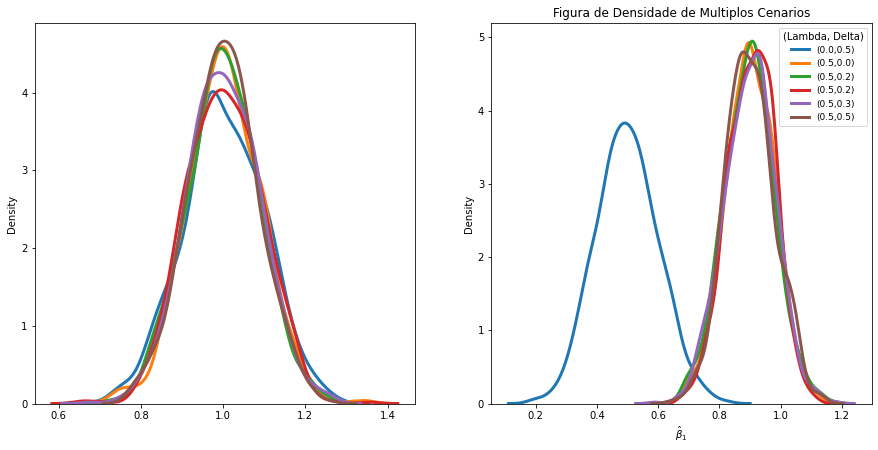

In [132]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    
    # Plotando a densidade
    sns.distplot(parametros[:, 0, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[0])
    
    
# Formatação
plt.legend(prop={'size': 9}, title = '(Lambda, Delta)')
plt.xlabel(r'$\hat{\beta}_0$')
plt.ylabel('Density')

plt.title('Figura de Densidade de Multiplos Cenarios')

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    # Plotando a densidade
    sns.distplot(parametros[:, 1, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[1])
    
    
# Formatação
plt.legend(prop={'size': 9}, title = '(Lambda, Delta)')
plt.xlabel(r'$\hat{\beta}_1$')
plt.ylabel('Density')
plt.show()
